In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [327]:
#import data
#dropna() due to missing data in warp and weft shrinkage
table_train=pd.read_excel("Shrinkage+Data+for+HKU+updated+0630.xlsx").dropna()

In [328]:
warp_count_dict = {}

for index, row in table_train.iterrows():
    warp_count_dict[row['Warp_Count\n经纱支']] = row['经纱支']

In [329]:
weft_count_dict = {}

for index, row in table_train.iterrows():
    weft_count_dict[row['Weft_Count\n纬纱支']] = row['纬纱支']
print(weft_count_dict)

{50: 50, 20: 20, 60: 60, 70: 70, '80/2': 40, 30: 30, 80: 80, 40: 40, '40+50/2': '40', 12: 12, '100/2': 50, '30/2': 15, '32/2': 16, '60+30': '60', '40+70': '40', '70+30': '70', '120/2': 60, '70+50': '70', '60/2': 30, '25/2': 12.5, '70+20': '70', '50+40': '50', '40+50': '40', '20/2': 10, 100: 100, '80+30': '80', '80/2+40': 40, '20+20/2+40/2': '20', 16: 16, '50+80': '50', '80+50': '80', '100/2+50': 50, '50+50\\40D': '50+50\\40D', '40+40\\40D': '40+40\\40D', 10: 10, 8: 8, '20\\40D': '20\\40D', '30+60/2': '30', '20+20\\70D': '20+20\\70D', '60+21': '60', '40+40/2': '40', '40/2': 20, '60+20': '60', '60/60+60/2': 30, '16\\70D': '16\\70D', '60/2+60/60': 30, '50/2': 25, '50+70': '50', '60\\30D': '60\\30D', '20\\70D': '20\\70D', '40/40+20': 20, '70+60\\30D': '70+60\\30D', '70/2': 35, '30+80': '30', '30+60/60': '30', '60+60\\30D': '60+60\\30D', '25+100/100+50+50/50': '25', '40+80/2': '40', 32: 32, 21: 21, '30\\40D': '30\\40D', '40+80/80': '40', '40D\\20D': '40D\\20D', '80/2+40/40': 40, '50+50/2': 

In [330]:
drop_cols_train=[
            'gf_id\n品种ID',
            'gf_no\n品种号',
            'PPO_no\nPPO号',
            'fabric_no\n布号',
            'send_no\n送布单号',
            'test_date\n测试时间',
            'warp_shrinkage\n经向缩率',
            'weft_shrinkage\n纬向缩率',
            'weft_shrinkage\n纬向缩率',
            'Warp_Type\n经纱纱型',
            'Weft_Type\n纬纱纱型',
            'Warp_Count\n经纱支',
            'Weft_Count\n纬纱支',
            'Component\n成份'
            ]
table_train_X= table_train.drop(drop_cols_train,axis=1)
table_train_X.shape

(113357, 10)

In [331]:
table_train_X.head()

,wash_method\n洗水方法,Fabric_Type\n织法,经纱支,纬纱支,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,Finishing_Method\n整理方法,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Mercerizing\n丝光碱浓
0,GW,P,50,50,120,100,1+,2.0,2.0,24BE
1,GW,P,50,50,120,100,1+,2.0,2.0,24BE
2,GW,O,40,20,110,54,1+,2.0,2.0,18BE
3,GW,C,50,50,150,126,1+,2.0,2.0,24BE
4,GW,C,50,50,150,126,1+,2.0,2.0,24BE


In [332]:
table_prod=pd.read_excel("Data+Test+of+shrinkage+for+HKU.xlsx")

In [333]:
# import re
# def convert_shrinkage (row, feature_name) :
#     raw = str(row[feature_name])
#     type1 = re.search(r'^(\d+)\+[\d+\/]+$', raw)
#     type2 = re.search(r'^(\d+)\/(\d+)$', raw)            
#     if type1 != None:
#         return float(type1.group(1))
#     elif type2 != None:
#         num = type2.group(1)
#         denum = type2.group(2)
#         return float(num)/float(denum)
#     else :
#         return row[feature_name]

In [334]:
import re
def convert_shrinkage (row, dicts, feature_name) :        
    if dicts[row[feature_name]] != None:
        return dicts[row[feature_name]]
    else :
        return row[feature_name]

In [335]:
table_prod['经纱支'] = table_prod.apply (lambda row: convert_shrinkage(row, warp_count_dict, 'Warp_Count\n经纱支'), axis=1)
table_prod['纬纱支'] = table_prod.apply (lambda row: convert_shrinkage(row,  weft_count_dict,  'Weft_Count\n纬纱支'), axis=1)

In [336]:
# table_prod['纬纱支'][0:51]
# table_prod['纬纱支'][51:101]
# table_prod['纬纱支'][101:151]
# table_prod['纬纱支'][151:201]

In [337]:
drop_cols_prod=['NO','Warp_Type\n经纱纱型', 'Weft_Type\n纬纱纱型', 'Warp_Count\n经纱支', 'Weft_Count\n纬纱支']
table_prod_X=table_prod.drop(drop_cols_prod,axis=1)

In [338]:
table_prod_X.shape

(200, 10)

In [339]:
raw_data=pd.concat([table_train_X,table_prod_X], axis=0)
raw_data.head()

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Fabric_Type\n织法,Finishing_Method\n整理方法,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Mercerizing\n丝光碱浓,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,wash_method\n洗水方法,纬纱支,经纱支
0,P,1+,2.0,2.0,24BE,120,100,GW,50,50
1,P,1+,2.0,2.0,24BE,120,100,GW,50,50
2,O,1+,2.0,2.0,18BE,110,54,GW,20,40
3,C,1+,2.0,2.0,24BE,150,126,GW,50,50
4,C,1+,2.0,2.0,24BE,150,126,GW,50,50


In [340]:
raw_data.shape

(113557, 10)

In [341]:
print('Number of row and columns in train+test set: ', table_train_X.shape)
print('Number of row and columns in production set: ', table_prod_X.shape)
print('Total Number of row and columns', raw_data.shape)

Number of row and columns in train+test set:  (113357, 10)
Number of row and columns in production set:  (200, 10)
Total Number of row and columns (113557, 10)


In [342]:
#clean the X
#fabric_type to int
Wash_Method_dummpy = pd.get_dummies(raw_data['wash_method\n洗水方法'],drop_first=False,prefix='wash_method')
Fabric_Type_dummpy = pd.get_dummies(raw_data['Fabric_Type\n织法'],drop_first=False,prefix='Fabric_Type')
Finishing_Method_dummpy = pd.get_dummies(raw_data['Finishing_Method\n整理方法'],drop_first=False,prefix='Finishing_Method')
Mercerizing_dummpy = pd.get_dummies(raw_data['Mercerizing\n丝光碱浓'],drop_first=False,prefix='Mercerizing')
Warp_Count_dummpy = pd.get_dummies(raw_data['经纱支'],drop_first=False,prefix='Warp_Count')
Weft_Count_dummpy = pd.get_dummies(raw_data['纬纱支'],drop_first=False,prefix='Weft_Count')
dummpy_data = pd.concat([Wash_Method_dummpy, Fabric_Type_dummpy, Finishing_Method_dummpy, Mercerizing_dummpy, Mercerizing_dummpy, Warp_Count_dummpy, Weft_Count_dummpy], axis =1)
dummpy_data.head()



,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,wash_method_BSR,wash_method_CGK,wash_method_CHW,wash_method_COWA,wash_method_CSD,wash_method_CSW,...,Weft_Count_70,Weft_Count_70+60\30D,Weft_Count_70+80\20D,Weft_Count_70+80\20D/80,Weft_Count_80,Weft_Count_80+40\40D,Weft_Count_80+80\20D,Weft_Count_80/2+40\40D,Weft_Count_80/2+40\42DX,Weft_Count_88D/36F
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
a = np.zeros((8, 8), int)
np.fill_diagonal(a, 1)
pd.DataFrame(a, index = Fabric_Type_dummpy.columns,  columns =Fabric_Type_dummpy.columns)

,Fabric_Type_C,Fabric_Type_D,Fabric_Type_H,Fabric_Type_J,Fabric_Type_K,Fabric_Type_O,Fabric_Type_P,Fabric_Type_S
Fabric_Type_C,1,0,0,0,0,0,0,0
Fabric_Type_D,0,1,0,0,0,0,0,0
Fabric_Type_H,0,0,1,0,0,0,0,0
Fabric_Type_J,0,0,0,1,0,0,0,0
Fabric_Type_K,0,0,0,0,1,0,0,0
Fabric_Type_O,0,0,0,0,0,1,0,0
Fabric_Type_P,0,0,0,0,0,0,1,0
Fabric_Type_S,0,0,0,0,0,0,0,1


In [344]:
drop_cols_convert=['wash_method\n洗水方法','Fabric_Type\n织法','Finishing_Method\n整理方法','Mercerizing\n丝光碱浓', '经纱支', '纬纱支']
data = pd.concat([raw_data.drop(drop_cols_convert,axis=1),dummpy_data],axis =1)
data.head()

,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,wash_method_BSR,wash_method_CGK,...,Weft_Count_70,Weft_Count_70+60\30D,Weft_Count_70+80\20D,Weft_Count_70+80\20D/80,Weft_Count_80,Weft_Count_80+40\40D,Weft_Count_80+80\20D,Weft_Count_80/2+40\40D,Weft_Count_80/2+40\42DX,Weft_Count_88D/36F
0,2.0,2.0,120,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,120,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,110,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,150,126,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,150,126,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
# clean the Y
warp_shrinkage = table_train['warp_shrinkage\n经向缩率'].astype(str).str.extract(r'(-?\d+.\d+)').astype('float')
warp_shrinkage.head()
weft_shrinkage = table_train['weft_shrinkage\n纬向缩率'].astype(str).str.extract(r'(-?\d+.?\d*)').astype('float')
weft_shrinkage.head()

,0
0,-0.60
1,-0.87
2,-1.37
3,-1.13
4,-0.60


In [346]:
#split the train dataset and test dataset
X = data.head(table_train_X.shape[0]).values
Y = pd.concat([warp_shrinkage,weft_shrinkage], axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=1234)
Y_train_warp= Y_train[:, 0]
Y_train_weft= Y_train[:, 1]
Y_test_warp= Y_test[:, 0]
Y_test_weft= Y_test[:, 1]
print('Number of row and columns in X train set:', X_train.shape)
print('Number of row and columns in Y train set for warp:', Y_train_warp.shape)
print('Number of row and columns in Y train set for weft:', Y_train_weft.shape)
print('Number of row and columns in X test set:', X_test.shape)
print('Number of row and columns in Y test set for warp:', Y_test_warp.shape)
print('Number of row and columns in Y train set for weft:', Y_test_weft.shape)

Number of row and columns in X train set: (90685, 410)
Number of row and columns in Y train set for warp: (90685,)
Number of row and columns in Y train set for weft: (90685,)
Number of row and columns in X test set: (22672, 410)
Number of row and columns in Y test set for warp: (22672,)
Number of row and columns in Y train set for weft: (22672,)


## Train model for warp shrinkage

In [347]:
'''模型调参'''
# from sklearn.model_selection import RandomizedSearchCV
# criterion=['mse','mae']
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'criterion':criterion,
#                 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #构建模型
# clf_warp= RandomForestRegressor()
# clf_random_warp = RandomizedSearchCV(estimator=clf_warp, param_distributions=random_grid,
#                               n_iter = 10,  
#                               cv = 3, verbose=2, random_state=42, n_jobs=1)
# #回归
# clf_random_warp.fit(X_train, Y_train_warp)
# print (clf_random_warp.best_params_)

'模型调参'

In [353]:
%%time
import joblib
from pathlib import Path
from sklearn.datasets import load_iris

criterion='mse'
bootstrap=False
max_features='sqrt'
max_depth=20
min_samples_split=10
n_estimators=2400
min_samples_leaf=2


joblib_name_warp = Path(f"predict_warp_random_forest_{criterion}_{n_estimators}_{max_features}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{bootstrap}.joblib") 
joblib_name_file_warp = Path(joblib_name_warp)

#load or train the rf
if joblib_name_file_warp.is_file():
    rf_warp = joblib.load(joblib_name_warp)
    print('loaded trained model from', joblib_name_warp)
else:
    rf_warp=RandomForestRegressor(criterion=criterion,bootstrap=bootstrap,max_features=max_features, max_depth=max_depth,min_samples_split=min_samples_split, n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
    rf_warp.fit(X_train, Y_train_warp) 
    joblib.dump(rf_warp, joblib_name_warp)
    print('dumpped trained model to', joblib_name_warp)

dumpped trained model to predict_warp_random_forest_mse_2400_sqrt_20_10_2_False.joblib
CPU times: user 17min 43s, sys: 4.54 s, total: 17min 47s
Wall time: 17min 49s


## Train model for weft shrinkage

In [354]:
'''模型调参'''
# from sklearn.model_selection import RandomizedSearchCV
# criterion=['mse','mae']
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 200)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'criterion':criterion,
#                 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #构建模型
# clf_weft= RandomForestRegressor()
# clf_random_weft = RandomizedSearchCV(estimator=clf_weft, param_distributions=random_grid,
#                               n_iter = 10,  
#                               cv = 3, verbose=2, random_state=42, n_jobs=1)
# #回归
# clf_random_weft.fit(X_train, Y_train_weft)
# print (clf_random_weft.best_params_)

'模型调参'

In [355]:
%%time
import joblib
from pathlib import Path
from sklearn.datasets import load_iris

criterion='mse'
bootstrap=False
max_features='sqrt'
max_depth=20
min_samples_split=10
n_estimators=1200
min_samples_leaf=2


joblib_name_weft = Path(f"predict_weft_random_forest_{criterion}_{n_estimators}_{max_features}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{bootstrap}.joblib") 
joblib_name_file_weft = Path(joblib_name_weft)

#load or train the rf
if joblib_name_file_weft.is_file():
    rf_weft = joblib.load(joblib_name_weft)
    print('loaded trained model from', joblib_name_weft)
else:
    rf_weft=RandomForestRegressor(criterion=criterion,bootstrap=bootstrap,max_features=max_features, max_depth=max_depth,min_samples_split=min_samples_split, n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
    rf_weft.fit(X_train, Y_train_weft) 
    joblib.dump(rf_weft, joblib_name_weft)
    print('dumpped trained model to', joblib_name_weft)

dumpped trained model to predict_weft_random_forest_mse_1200_sqrt_20_10_2_False.joblib
CPU times: user 9min 2s, sys: 1.64 s, total: 9min 4s
Wall time: 9min 4s


## Predict train and test warp and weft shrinkage

In [356]:
%%time
#Predict the train and test result 
y_train_pred_warp=rf_warp.predict(X_train)
y_test_pred_warp=rf_warp.predict(X_test)

y_train_pred_weft=rf_weft.predict(X_train)
y_test_pred_weft=rf_weft.predict(X_test)

CPU times: user 59.9 s, sys: 247 ms, total: 1min
Wall time: 1min


## Feature importance for warp shrinkage

In [357]:
#feature importance
feature=data.columns
feature_list_warp = []
importance_list_warp = []
for i in range(len(feature)):
    if rf_warp.feature_importances_.round(2)[i]>= 0.03:#将变量重要性大于0.03的显示出来
        feature_list_warp.append(feature[i])
        importance_list_warp.append(rf_warp.feature_importances_.round(2)[i])

In [358]:
# plot the feature importance
from pyecharts.charts import Bar
from pyecharts import options as opts
bar_warp = (
    Bar()
    .add_xaxis(feature_list_warp)
    .add_yaxis("importance", importance_list_warp)
    .set_global_opts(title_opts=opts.TitleOpts(title="warp shrinkage feature importance"))
)
bar_warp.render_notebook()

## Feature importance for weft shrinkage

In [359]:
#feature importance
feature=data.columns
feature_list_weft = []
importance_list_weft = []
for i in range(len(feature)):
    if rf_weft.feature_importances_.round(2)[i]>= 0.03:#将变量重要性大于0.03的显示出来
        feature_list_weft.append(feature[i])
        importance_list_weft.append(rf_warp.feature_importances_.round(2)[i])

In [360]:
# plot the feature importance
from pyecharts.charts import Bar
from pyecharts import options as opts
bar_weft = (
    Bar()
    .add_xaxis(feature_list_weft)
    .add_yaxis("importance", importance_list_weft)
    .set_global_opts(title_opts=opts.TitleOpts(title="weft shrinkage feature importance"))
)
bar_weft.render_notebook()

## Decision model evaluation for warp shrinkage

In [ ]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf_warp.score(X_train,Y_train_warp))
print ('均方差',mean_squared_error(Y_train_warp,y_train_pred_warp))
print ('绝对差',mean_absolute_error(Y_train_warp,y_train_pred_warp))
print ('解释度',explained_variance_score(Y_train_warp,y_train_pred_warp))

print ("决策树模型评估--验证集：")
print ('验证r^2:',rf_warp.score(X_test,Y_test_warp))
print ('均方差',mean_squared_error(Y_test_warp,y_test_pred_warp))
print ('绝对差',mean_absolute_error(Y_test_warp,y_test_pred_warp))
print ('解释度',explained_variance_score(Y_test_warp,y_test_pred_warp))

## Decision model evaluation for weft shrinkage

In [362]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf_weft.score(X_train,Y_train_weft))
print ('均方差',mean_squared_error(Y_train_weft,y_train_pred_weft))
print ('绝对差',mean_absolute_error(Y_train_weft,y_train_pred_weft))
print ('解释度',explained_variance_score(Y_train_weft,y_train_pred_weft))

print ("决策树模型评估--验证集：")
print ('验证r^2:',rf_weft.score(X_test,Y_test_weft))
print ('均方差',mean_squared_error(Y_test_weft,y_test_pred_weft))
print ('绝对差',mean_absolute_error(Y_test_weft,y_test_pred_weft))
print ('解释度',explained_variance_score(Y_test_weft,y_test_pred_weft))

决策树模型评估--训练集：
训练r^2: 0.48002289912442875
均方差 0.7512358918827425
绝对差 0.6741672314764415
解释度 0.48002289912442875
决策树模型评估--验证集：
验证r^2: 0.4768741746832974
均方差 0.7616844806575132
绝对差 0.6782267821747232
解释度 0.47691362038989793


## Mean and std of the predicted and true warp shrinkage

In [363]:
all_data_pred_warp = rf_warp.predict(X)
all_data_true_warp = Y[:, 0]
pred_mean_warp = np.mean(all_data_pred_warp)
pred_std_warp = np.std(all_data_pred_warp)
true_mean_warp = np.mean(all_data_true_warp)
true_std_warp = np.std(all_data_true_warp)
print(pred_mean_warp,pred_std_warp)
print(true_mean_warp,true_std_warp)

-1.1220345446130362 0.8201656480398497
-1.125320103743042 1.2822471264724367


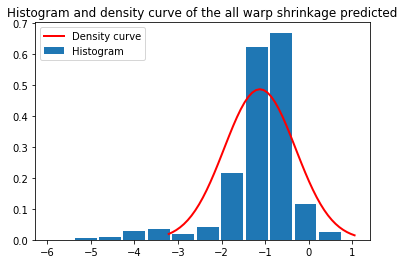

In [364]:
import scipy.stats as st 
s_warp=np.random.normal(pred_mean_warp, pred_std_warp, 500)
s_fit_warp = np.linspace(s_warp.min(), s_warp.max())
plt.plot(s_fit_warp, st.norm(pred_mean_warp, pred_std_warp).pdf(s_fit_warp), lw=2, c='r',label = "Density curve")
plt.hist(all_data_pred_warp,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of the all warp shrinkage predicted")
plt.legend()
plt.show()

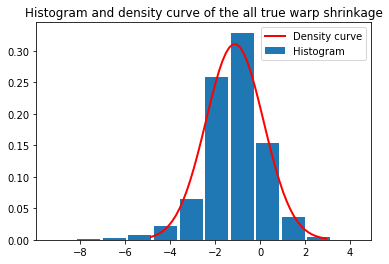

In [365]:
s_warp=np.random.normal(true_mean_warp, true_std_warp, 500)
s_fit_warp = np.linspace(s_warp.min(), s_warp.max())
plt.plot(s_fit_warp, st.norm(true_mean_warp, true_std_warp).pdf(s_fit_warp), lw=2, c='r',label = "Density curve")
plt.hist(all_data_true_warp,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of the all true warp shrinkage")
plt.legend()
plt.show()

## Plot the predict result for warp shrinkage

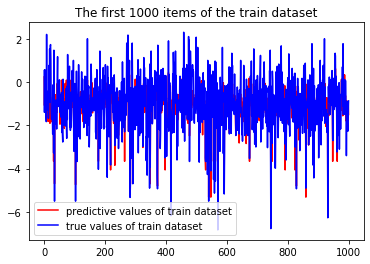

In [366]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,y_train_pred_warp[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train_warp[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

## The distribution of warp shrinkage residuals

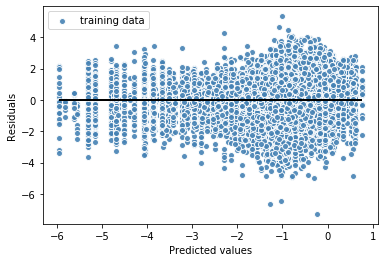

In [367]:
#残差分布图  r
plt.scatter(y_train_pred_warp,Y_train_warp-y_train_pred_warp, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred_warp.min(), xmax=y_train_pred_warp.max(), lw=2, color='black')
plt.show()

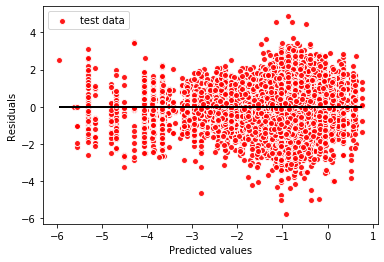

In [368]:
#残差分布图  r
plt.scatter(y_test_pred_warp,Y_test_warp-y_test_pred_warp, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred_warp.min(), xmax=y_test_pred_warp.max(), lw=2, color='black')
plt.show()



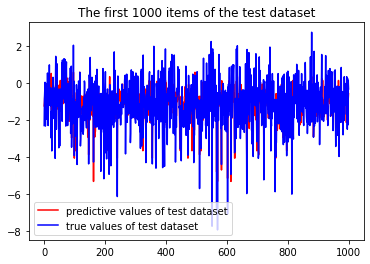

In [369]:
t = np.arange(1000)
plt.plot(t,y_test_pred_warp[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test_warp[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

## Plot the predict result for weft shrinkage

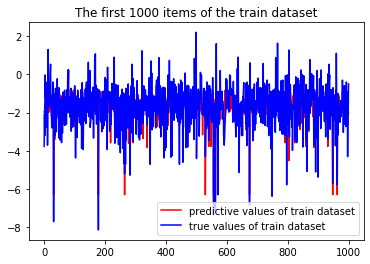

In [370]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,y_train_pred_weft[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train_weft[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

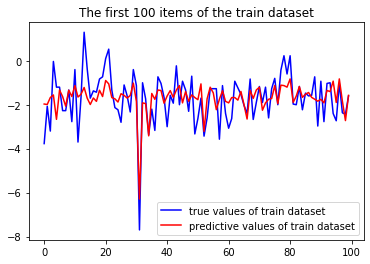

In [371]:
t = np.arange(100)
plt.plot(t,Y_train_weft[0:100],color="blue",label='true values of train dataset')
plt.plot(t,y_train_pred_weft[0:100],color="red",label='predictive values of train dataset')
plt.legend()
plt.title('The first 100 items of the train dataset')
plt.show()

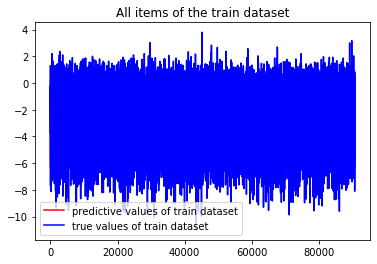

In [372]:
t = np.arange(y_train_pred_weft.shape[0])
plt.plot(t,y_train_pred_weft,color="red",label='predictive values of train dataset')
plt.plot(t,Y_train_weft,color="blue",label='true values of train dataset')
plt.legend()
plt.title('All items of the train dataset')
plt.show()

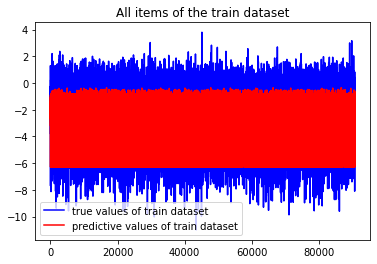

In [373]:
t = np.arange(y_train_pred_weft.shape[0])
plt.plot(t,Y_train_weft,color="blue",label='true values of train dataset')
plt.plot(t,y_train_pred_weft,color="red",label='predictive values of train dataset')
plt.legend()
plt.title('All items of the train dataset')
plt.show()

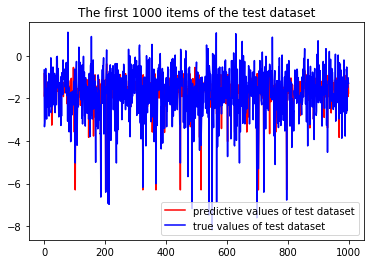

In [374]:
t = np.arange(1000)
plt.plot(t,y_test_pred_weft[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test_weft[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

## The distribution of warp shrinkage residuals

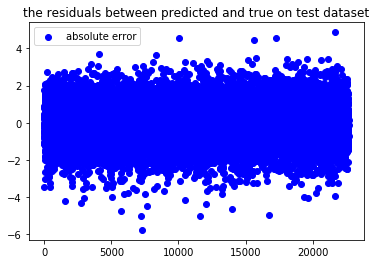

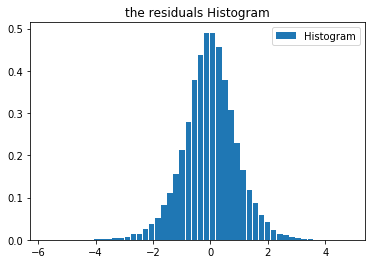

In [375]:
t = np.arange(Y_test_warp.shape[0])
residuals = Y_test_warp.ravel()-y_test_pred_warp.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


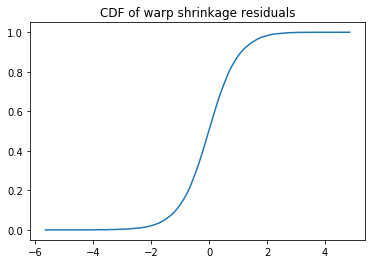

array([[-5.65216765,  0.00004411],
       [-5.54603648,  0.00004411],
       [-5.43990531,  0.00004411],
       [-5.33377415,  0.00004411],
       [-5.22764298,  0.00004411],
       [-5.12151181,  0.00004411],
       [-5.01538065,  0.00013232],
       [-4.90924948,  0.00017643],
       [-4.80311831,  0.00017643],
       [-4.69698715,  0.00022054],
       [-4.59085598,  0.00026464],
       [-4.48472481,  0.00026464],
       [-4.37859365,  0.00030875],
       [-4.27246248,  0.00039697],
       [-4.16633131,  0.00044107],
       [-4.06020015,  0.00052929],
       [-3.95406898,  0.00066161],
       [-3.84793781,  0.00079393],
       [-3.74180665,  0.00092625],
       [-3.63567548,  0.00105857],
       [-3.52954431,  0.001235  ],
       [-3.42341315,  0.00167608],
       [-3.31728198,  0.00189661],
       [-3.21115081,  0.0024259 ],
       [-3.10501965,  0.0030434 ],
       [-2.99888848,  0.00344037],
       [-2.89275731,  0.00401376],
       [-2.78662615,  0.00498412],
       [-2.68049498,

In [376]:
H,X1 = np.histogram(Y_test_warp.ravel()-y_test_pred_warp.ravel(), bins = 100, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

plt.plot(X1[1:], F1)
plt.title('CDF of warp shrinkage residuals')
plt.show()
np.set_printoptions(suppress=True)
np.hstack((X1[1:].reshape(X1[1:].shape[0],1),np.transpose([F1]) ))

## The distribution of weft shrinkage residuals

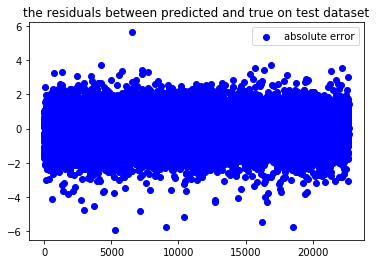

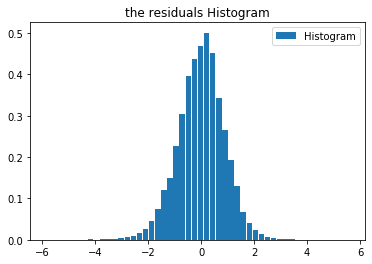

In [377]:
t = np.arange(Y_test_weft.shape[0])
residuals = Y_test_weft.ravel()-y_test_pred_weft.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


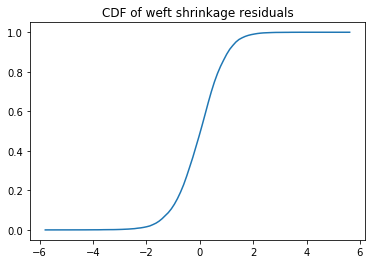

array([[-5.78813693,  0.00004411],
       [-5.67294669,  0.00013232],
       [-5.55775644,  0.00013232],
       [-5.44256619,  0.00013232],
       [-5.32737595,  0.00017643],
       [-5.2121857 ,  0.00017643],
       [-5.09699546,  0.00022054],
       [-4.98180521,  0.00022054],
       [-4.86661496,  0.00022054],
       [-4.75142472,  0.00026464],
       [-4.63623447,  0.00030875],
       [-4.52104422,  0.00030875],
       [-4.40585398,  0.00035286],
       [-4.29066373,  0.00039697],
       [-4.17547349,  0.00048518],
       [-4.06028324,  0.00057339],
       [-3.94509299,  0.00066161],
       [-3.82990275,  0.00066161],
       [-3.7147125 ,  0.00083804],
       [-3.59952225,  0.0011909 ],
       [-3.48433201,  0.00132322],
       [-3.36914176,  0.00145554],
       [-3.25395151,  0.00149965],
       [-3.13876127,  0.0018084 ],
       [-3.02357102,  0.00224947],
       [-2.90838078,  0.00277876],
       [-2.79319053,  0.00352858],
       [-2.67800028,  0.0042343 ],
       [-2.56281004,

In [378]:
H,X1 = np.histogram(Y_test_weft.ravel()-y_test_pred_weft.ravel(), bins = 100, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

plt.plot(X1[1:], F1)
plt.title('CDF of weft shrinkage residuals')
plt.show()
np.set_printoptions(suppress=True)
np.hstack((X1[1:].reshape(X1[1:].shape[0],1),np.transpose([F1]) ))

## The distribution of warp shrinkage residuals

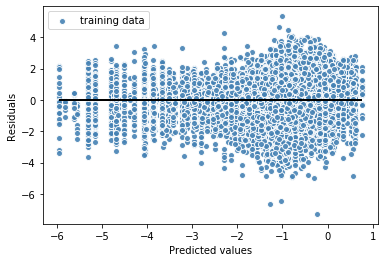

In [379]:
#残差分布图  r
plt.scatter(y_train_pred_warp,Y_train_warp-y_train_pred_warp, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred_warp.min(), xmax=y_train_pred_warp.max(), lw=2, color='black')
plt.show()

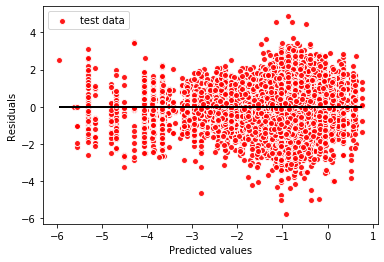

In [380]:
#残差分布图  r
plt.scatter(y_test_pred_warp,Y_test_warp-y_test_pred_warp, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred_warp.min(), xmax=y_test_pred_warp.max(), lw=2, color='black')
plt.show()



## The distribution of weft shrinkage residuals

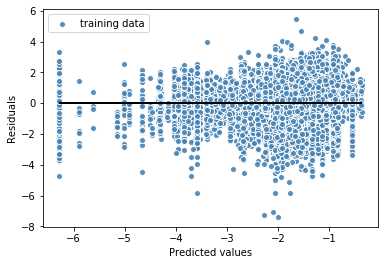

In [381]:
#残差分布图  r
plt.scatter(y_train_pred_weft,Y_train_weft-y_train_pred_weft, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred_weft.min(), xmax=y_train_pred_weft.max(), lw=2, color='black')
plt.show()

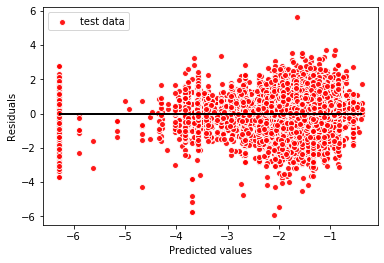

In [382]:
#残差分布图  r
plt.scatter(y_test_pred_weft,Y_test_weft-y_test_pred_weft, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred_weft.min(), xmax=y_test_pred_weft.max(), lw=2, color='black')
plt.show()



## Predict the production warp and weft shrinkage

In [383]:
X_prod = data.tail(table_prod_X.shape[0]).values
Y_prod_pred_warp=rf_warp.predict(X_prod)
Y_prod_pred_weft=rf_weft.predict(X_prod)

## Store the predicted production warf and weft shrinkage to Excel

In [384]:
Y_prod_pred_df = pd.DataFrame(list(zip(Y_prod_pred_warp, Y_prod_pred_weft)), columns=['warp_shrinkage\n经向缩率', 'weft_shrinkage\n纬向缩率'])
Y_prod_pred_df.to_excel("shrinkage_prediction_output.xlsx", index = False, sheet_name='shrinkage prediction') 

## Plot the first estimator of the RF model

In [385]:
# Extract single tree

from sklearn.tree import export_graphviz
from subprocess import call
# Export as dot file
estimator_warp = rf_warp.estimators_[0]
export_graphviz(estimator_warp, out_file='shrinkage_warp_tree_0.dot', 
                feature_names = data.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'shrinkage_warp_tree_0.dot', '-o', 'shrinkage_warp_tree_0.png', '-Gdpi=1800'])

0

In [386]:


estimator_weft = rf_weft.estimators_[0]
export_graphviz(estimator_weft, out_file='shrinkage_weft_tree_0.dot', 
                feature_names = data.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'shrinkage_weft_tree_0.dot', '-o', 'shrinkage_weft_tree_0.png', '-Gdpi=1800'])

0

## Plot the predicted production warp shrinkage

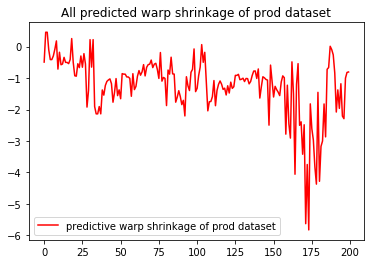

In [387]:
#the predicted prod results display
t = np.arange(Y_prod_pred_warp.shape[0])
plt.plot(t,Y_prod_pred_warp,color="red",label='predictive warp shrinkage of prod dataset')
plt.legend()
plt.title('All predicted warp shrinkage of prod dataset')
plt.show()

## Plot the predicted production weft shrinkage

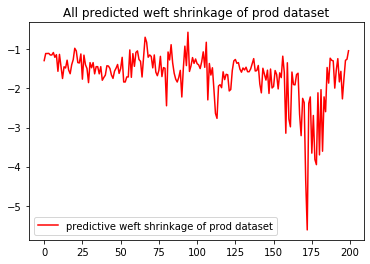

In [388]:
#the predicted prod results display
t = np.arange(Y_prod_pred_weft.shape[0])
plt.plot(t,Y_prod_pred_weft,color="red",label='predictive weft shrinkage of prod dataset')
plt.legend()
plt.title('All predicted weft shrinkage of prod dataset')
plt.show()